In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
match_info = pd.read_csv("match_info_data.csv")
teams = match_info["team1"].unique()
match_info

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin


In [4]:
winners = match_info["winner"].value_counts().keys()
winners_v = match_info["winner"].value_counts().values

Text(0.5, 1.0, 'Teams with more wins from 2007 to 2023')

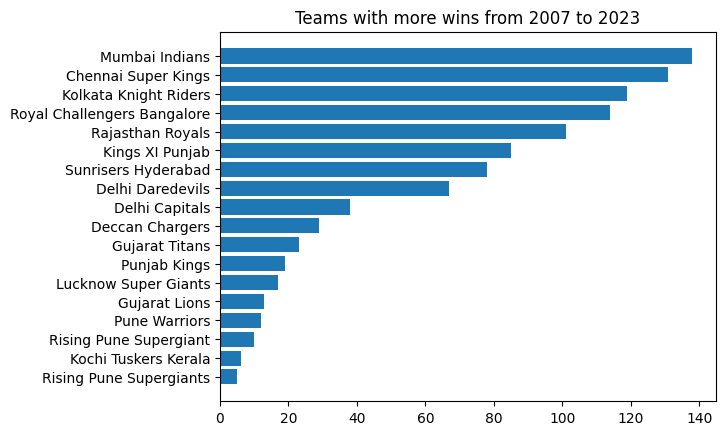

In [5]:
fig, ax = plt.subplots()
plt.barh(winners[::-1], winners_v[::-1])
ax.set_title("Teams with more wins from 2007 to 2023")

In [6]:
wickets = match_info["win_by_wickets"].unique()
runs = match_info["win_by_runs"].unique()

                           winner   season  win_by_runs
404                Mumbai Indians     2017          146
462   Royal Challengers Bangalore     2016          144
1023        Kolkata Knight Riders  2007/08          140
527   Royal Challengers Bangalore     2015          138
670   Royal Challengers Bangalore     2013          130
316           Sunrisers Hyderabad     2019          118
13    Royal Challengers Bangalore     2023          112
787               Kings XI Punjab     2011          111
968              Rajasthan Royals  2007/08          105
347                Mumbai Indians     2018          102


<BarContainer object of 10 artists>

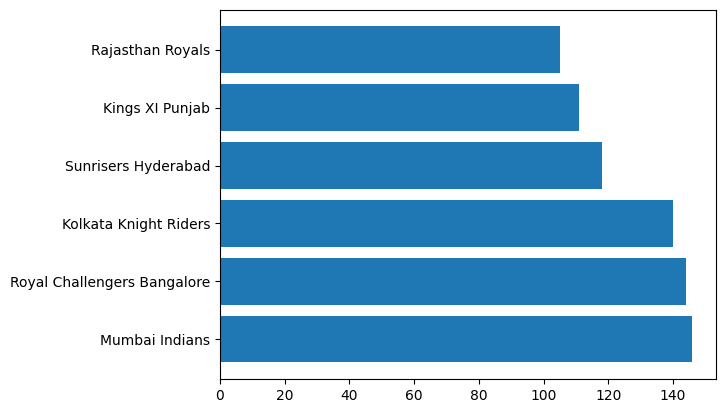

In [7]:
grouped = match_info[["winner", "season", "win_by_runs"]]
most_runs = grouped.loc[grouped["win_by_runs"].idxmax()]
top_10_runs = grouped.nlargest(10, "win_by_runs")
print(top_10_runs)
plt.barh(top_10_runs['winner'], top_10_runs['win_by_runs'])

In [8]:
grouped = match_info[["winner", "season", "win_by_wickets"]]
most_wickets = grouped.loc[grouped["win_by_wickets"].idxmax()]
top_10_wickets = grouped.nlargest(10, "win_by_wickets")
top_10_wickets

,winner,season,win_by_wickets
192,Royal Challengers Bangalore,2021,10
212,Sunrisers Hyderabad,2020/21,10
227,Mumbai Indians,2020/21,10
250,Chennai Super Kings,2020/21,10
340,Royal Challengers Bangalore,2018,10
412,Kings XI Punjab,2017,10
444,Kolkata Knight Riders,2017,10
492,Sunrisers Hyderabad,2016,10
541,Royal Challengers Bangalore,2015,10
691,Chennai Super Kings,2013,10


In [9]:
seasons = match_info["season"].unique()
seasons

array(['2023', '2022', '2021', '2020/21', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2009/10', '2009',
       '2007/08'], dtype=object)

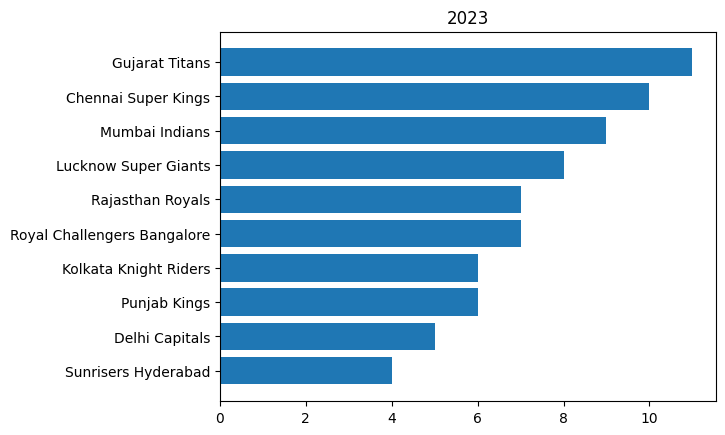

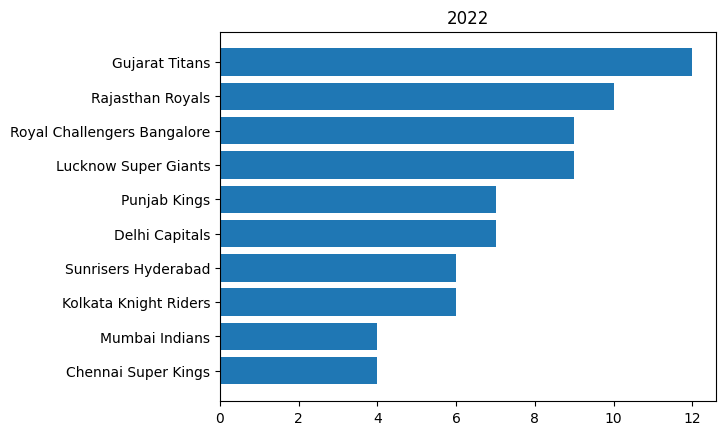

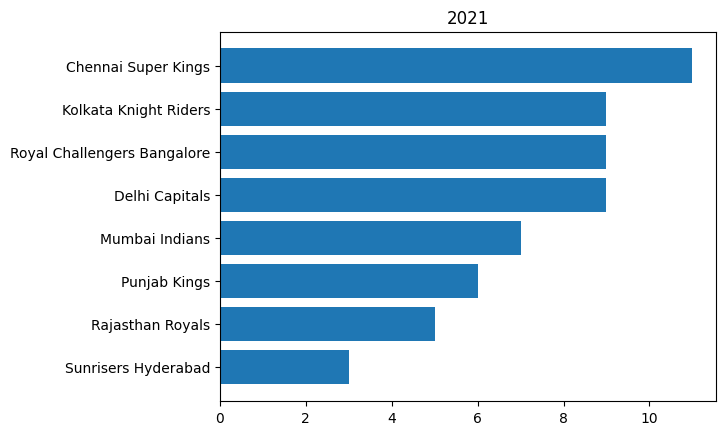

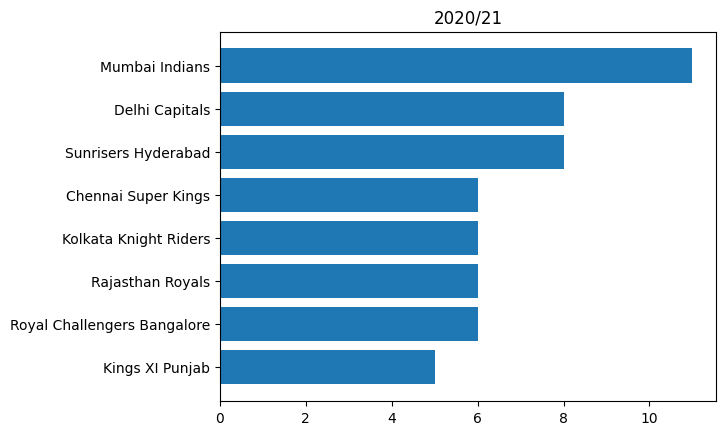

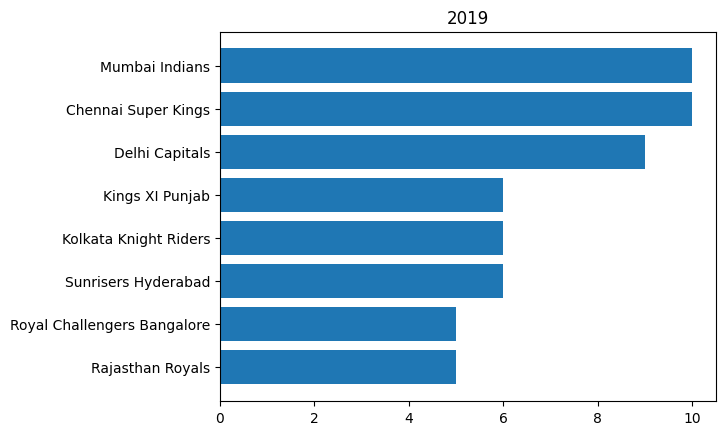

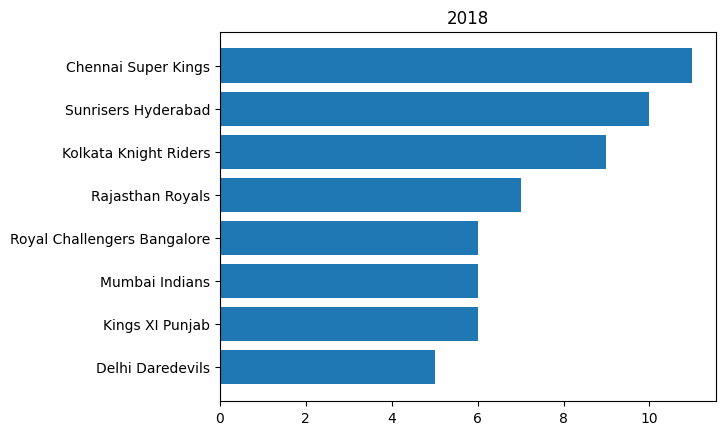

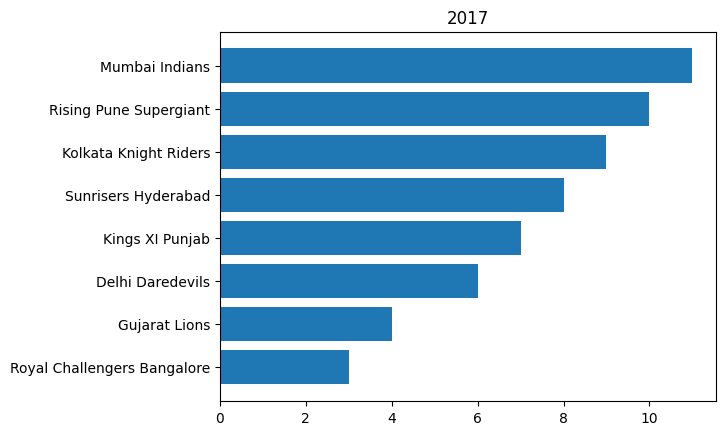

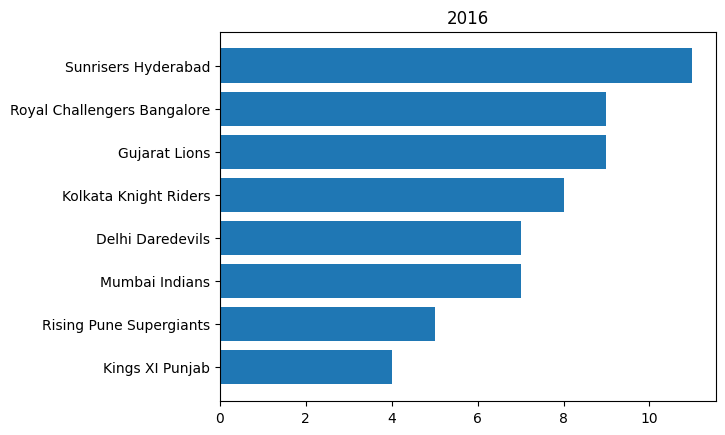

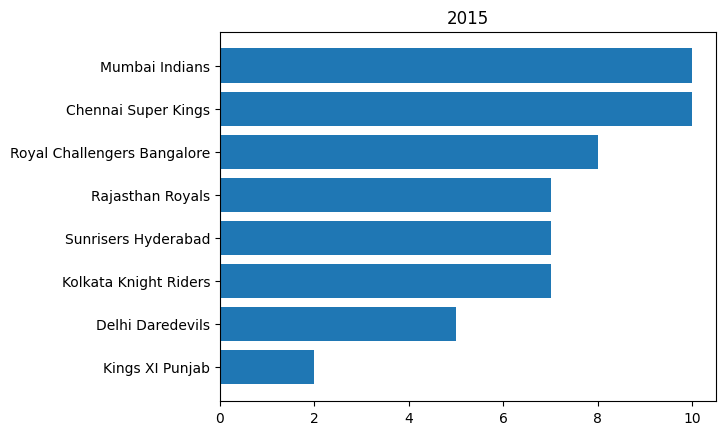

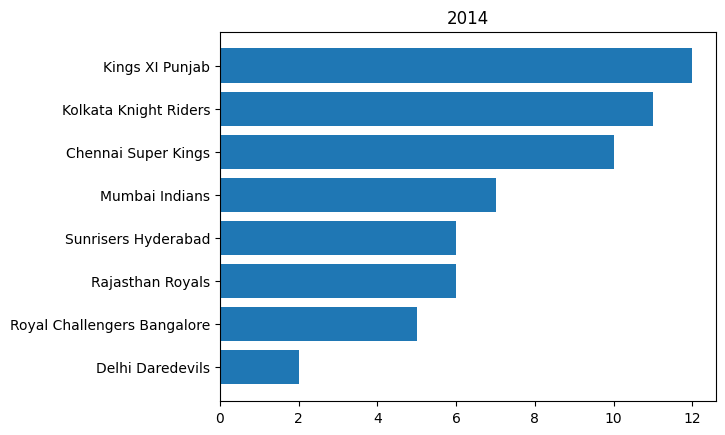

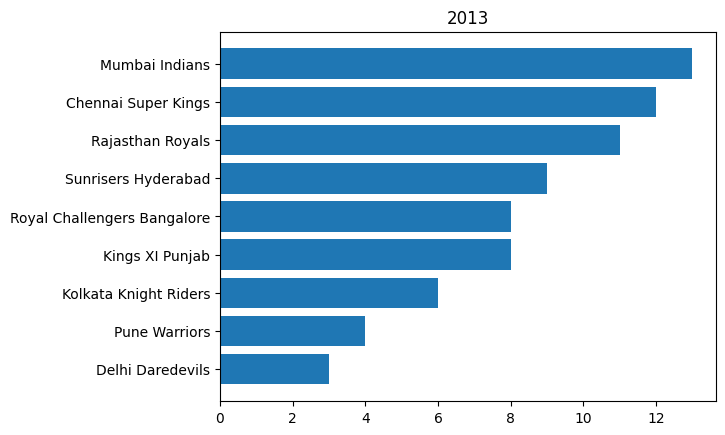

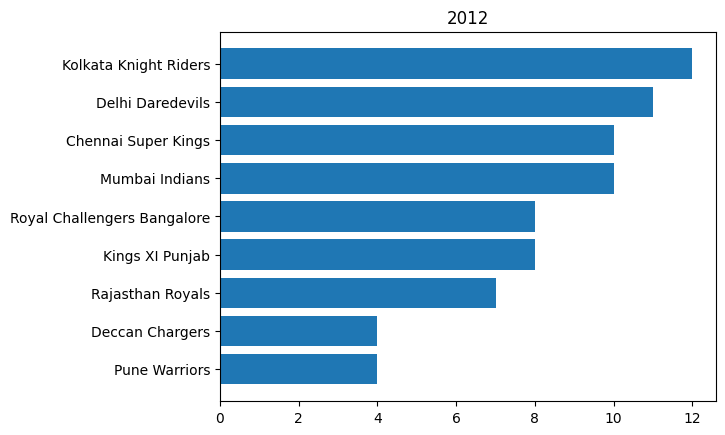

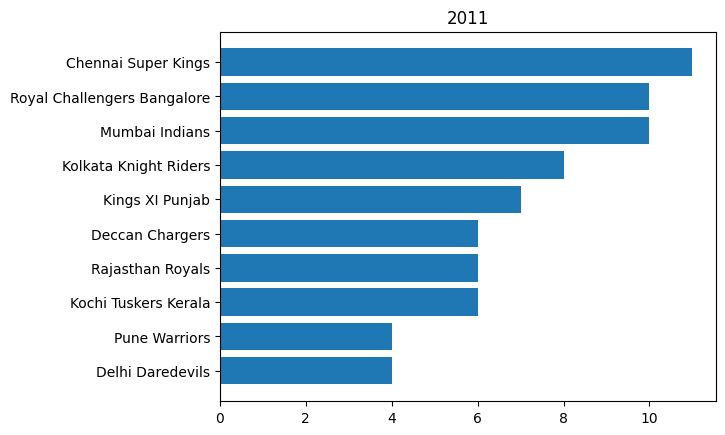

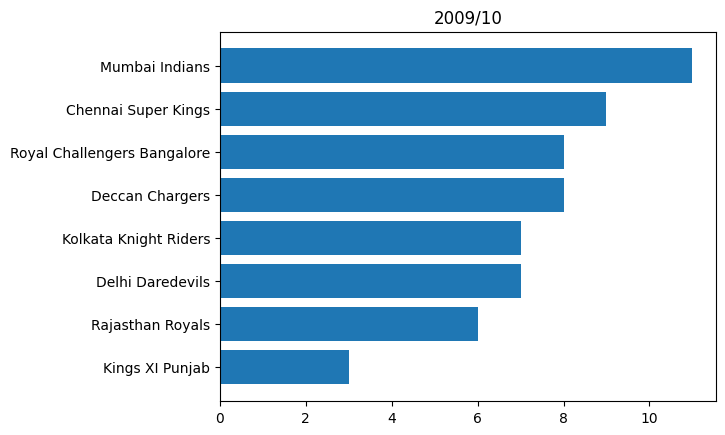

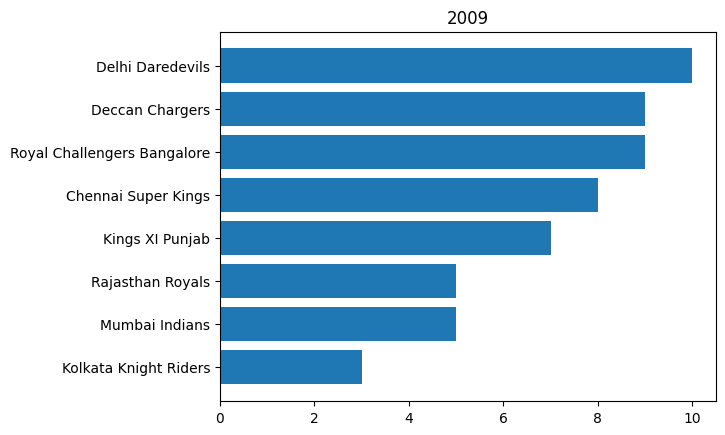

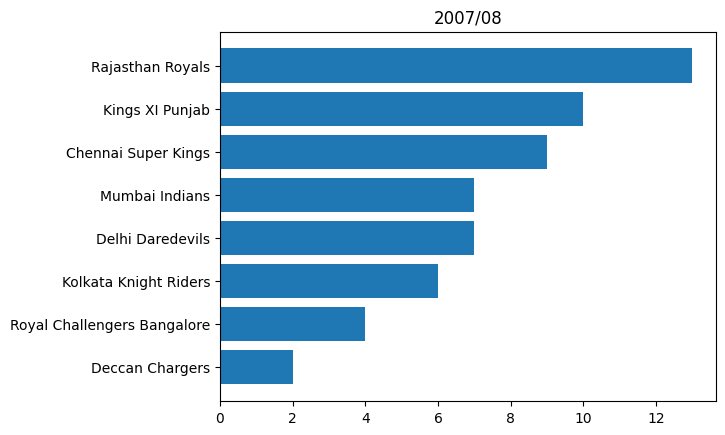

In [10]:
team_play = match_info[["season", "winner"]]

for season in seasons:
    season_data = team_play.loc[team_play["season"] == season]["winner"].value_counts()
    plt.barh(season_data.keys()[::-1], season_data.values[::-1])
    plt.title(season)
    plt.show()

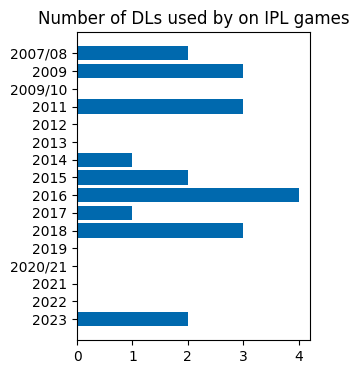

In [11]:
group = []
dl = match_info[["dl_applied", "season"]]
for season in seasons:
    count = dl.loc[match_info["season"] == str(season)].value_counts().reset_index(name="count")["count"]
    if len(count) > 1:
        group.append((count[1], season))
    else:
        group.append((0, season))

plt.figure(figsize=(3, 4))
plt.title("Number of DLs used by on IPL games")
for g in group:
    plt.barh(g[1], g[0], color="#0069AE")

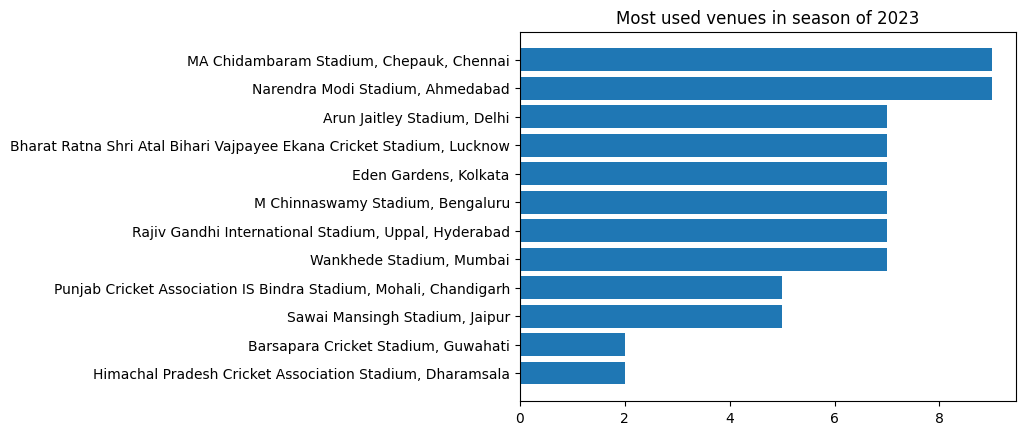

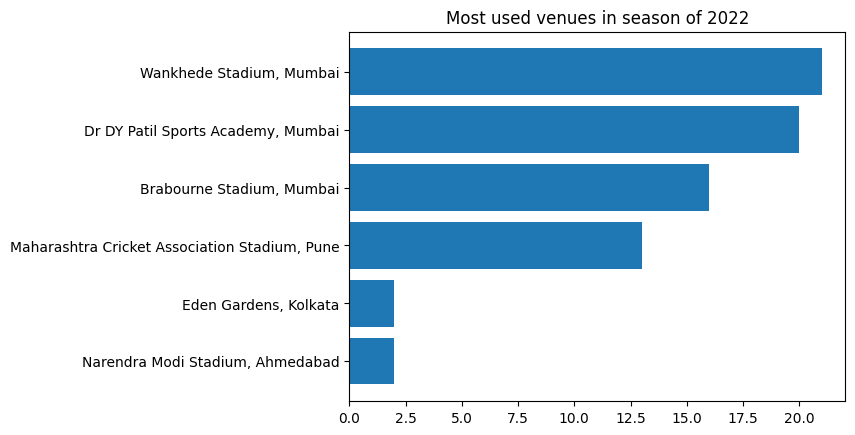

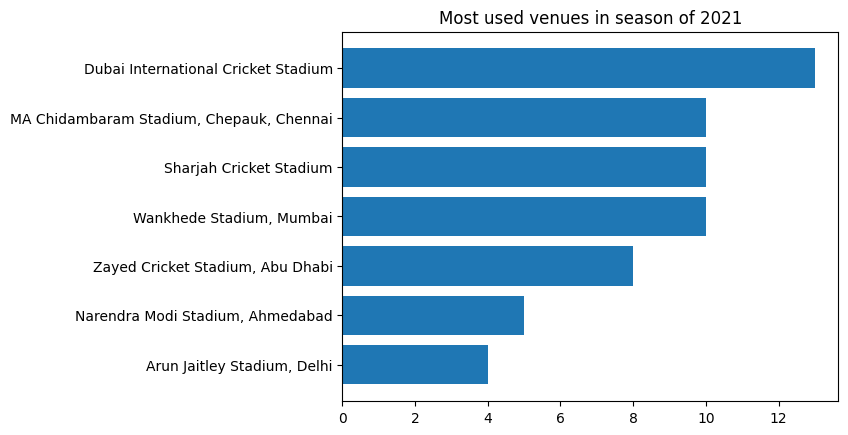

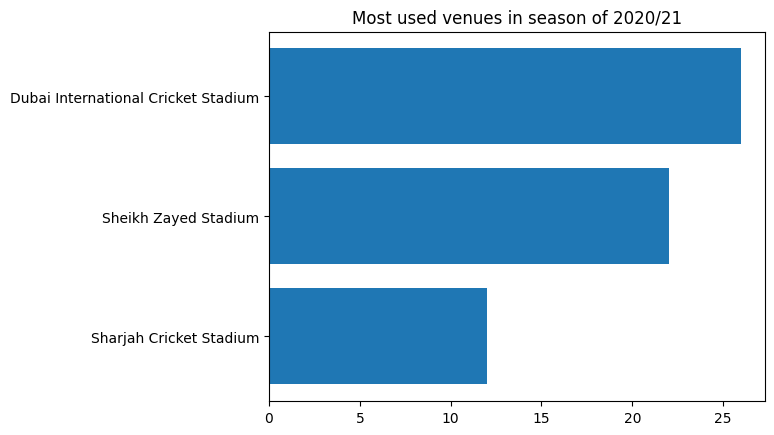

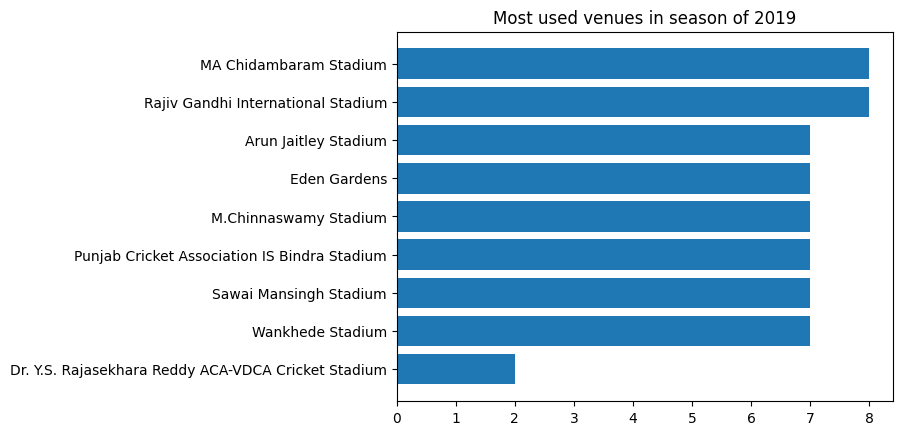

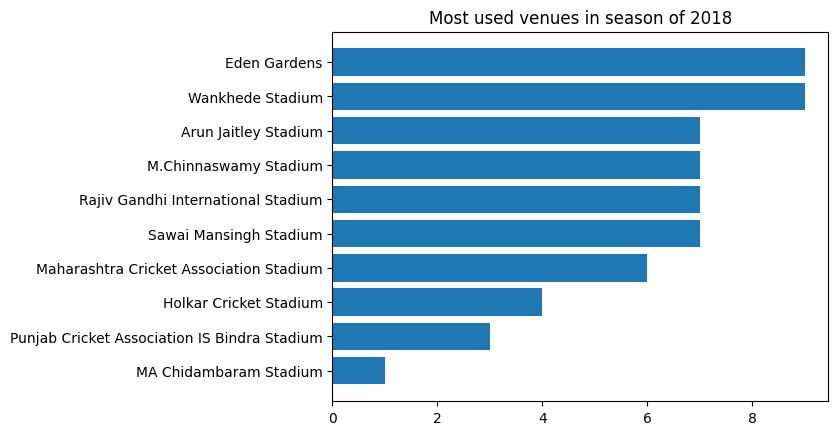

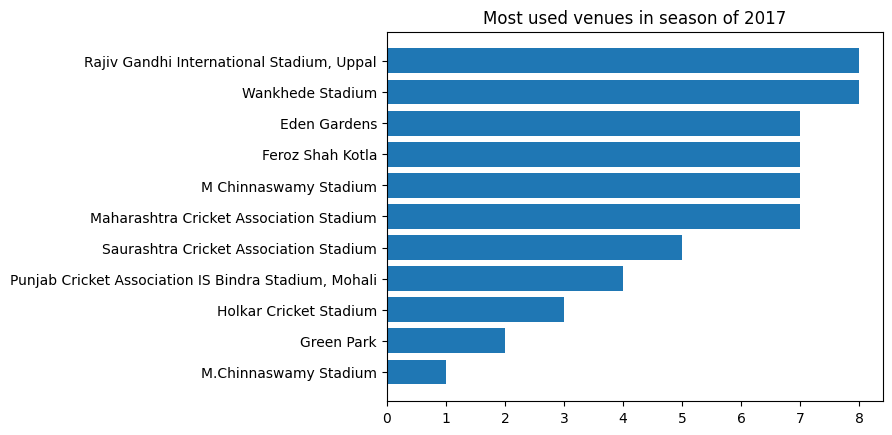

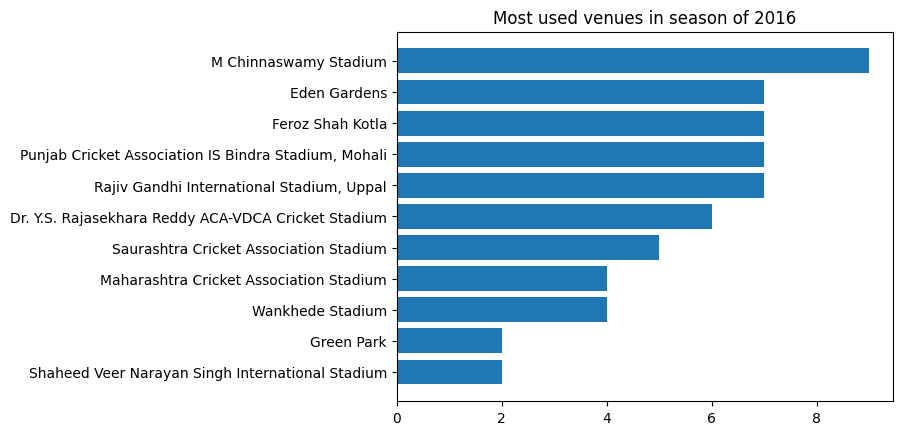

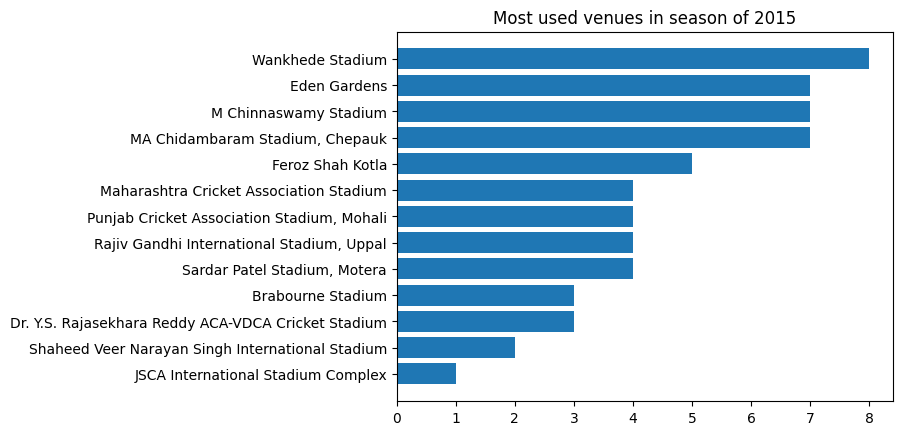

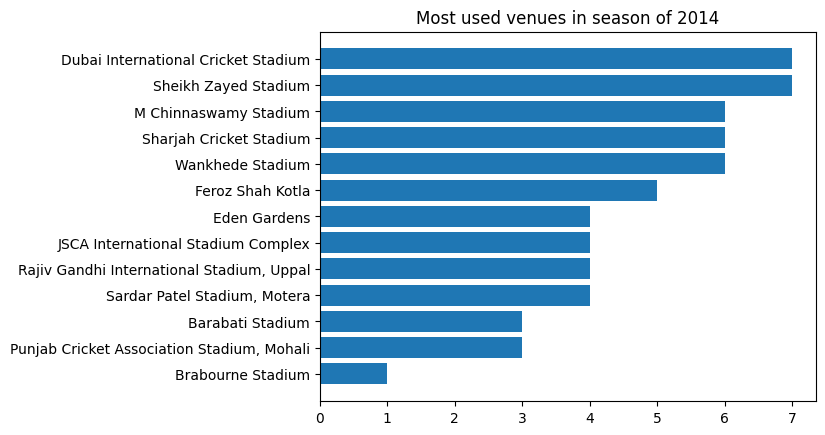

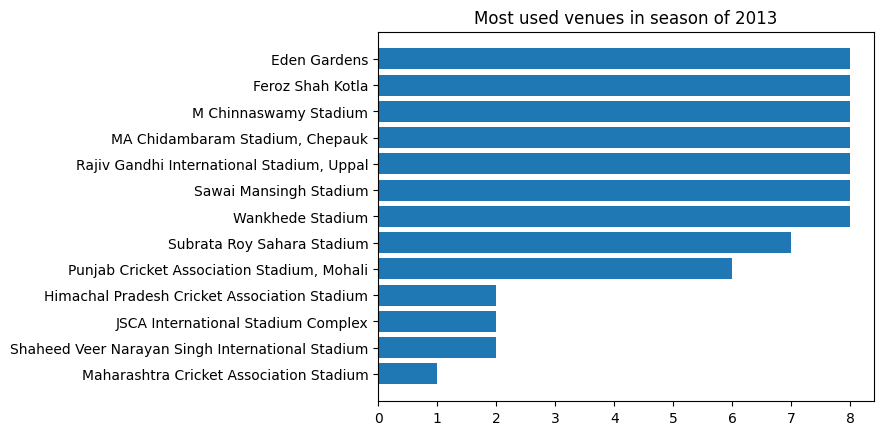

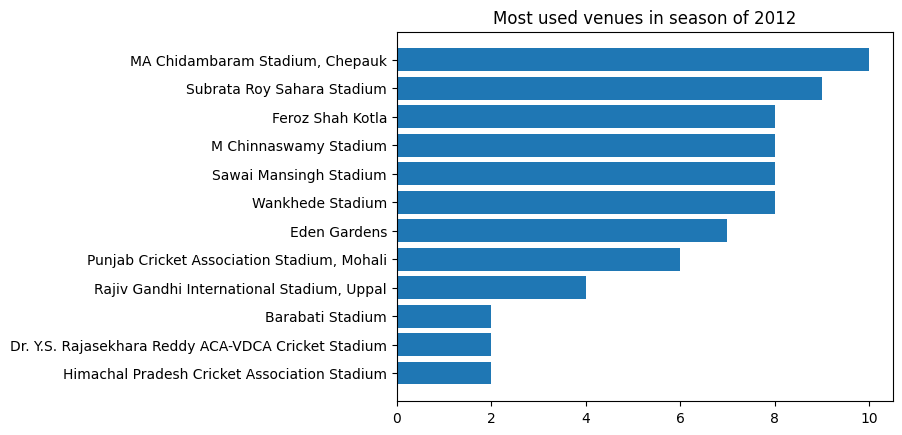

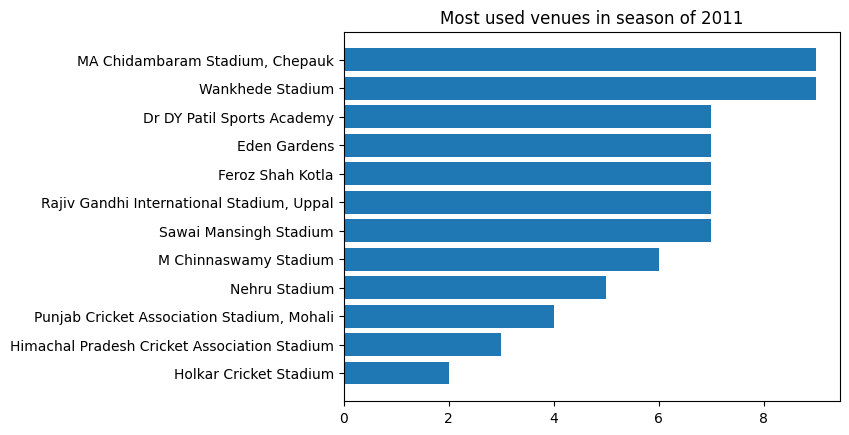

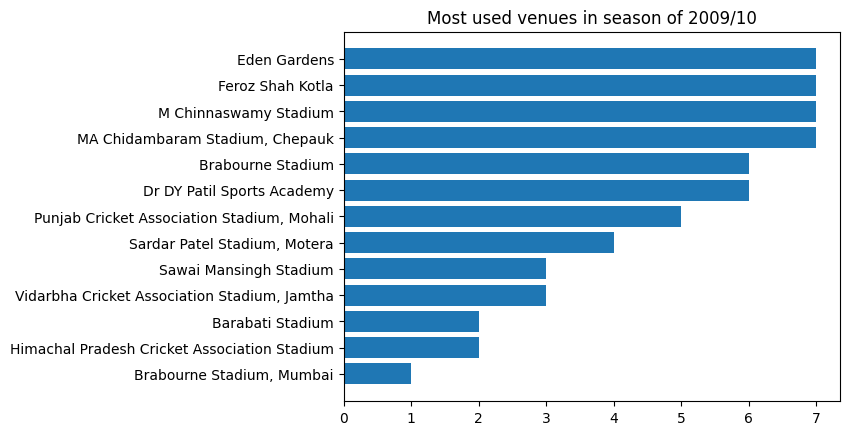

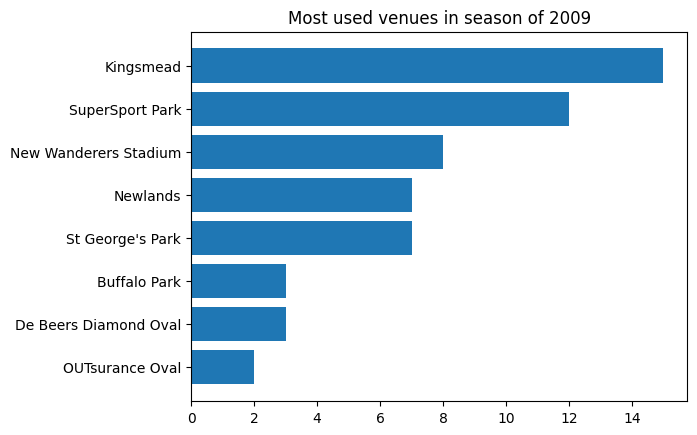

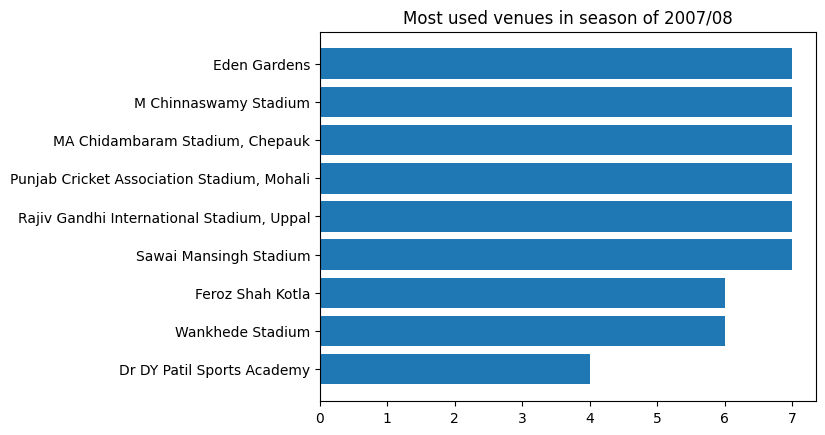

In [12]:
venues = match_info[["season", "venue"]]

for season in seasons:
    used_venues = venues.loc[venues["season"] == str(season)].value_counts().reset_index(name="count")
    plt.title(f"Most used venues in season of {season}")
    plt.barh(used_venues["venue"][::-1], used_venues["count"][::-1])
    plt.show()

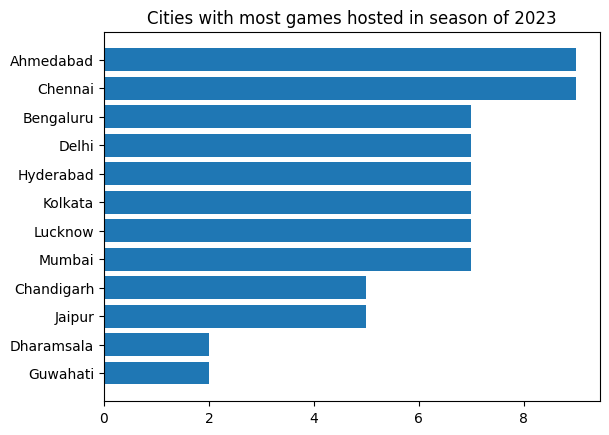

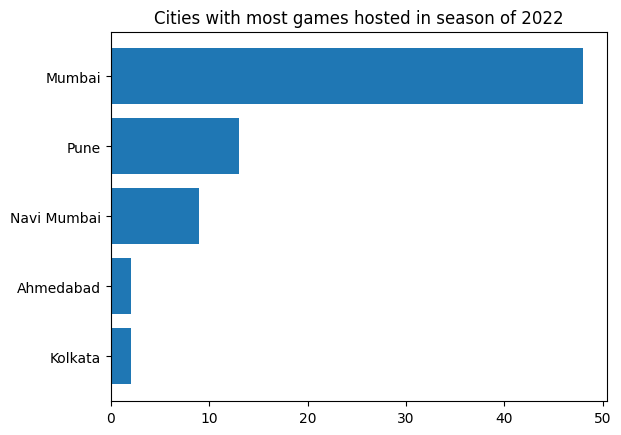

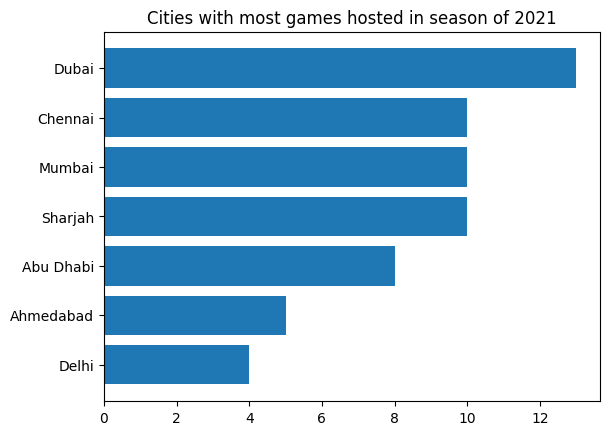

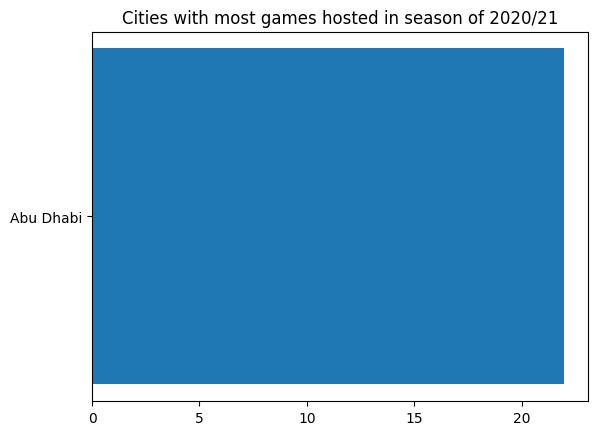

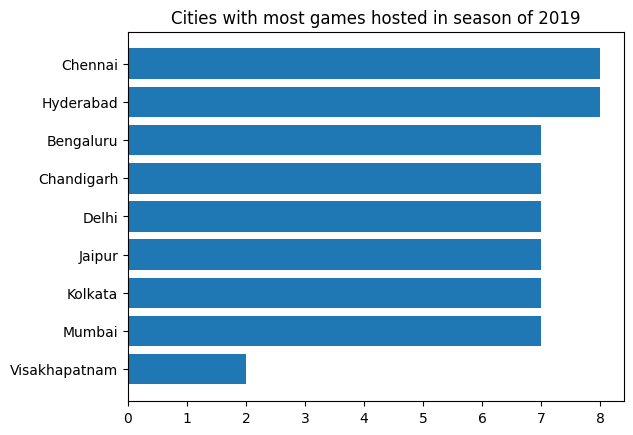

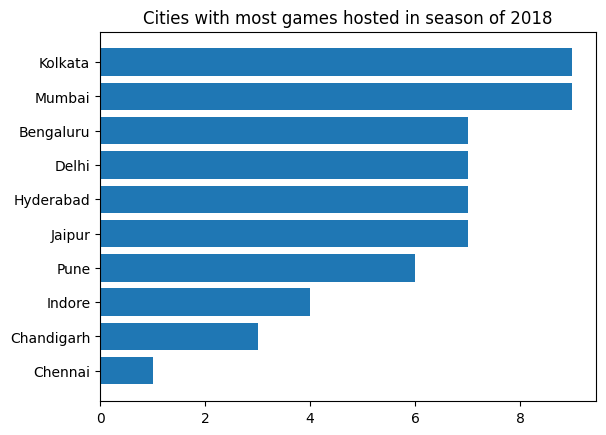

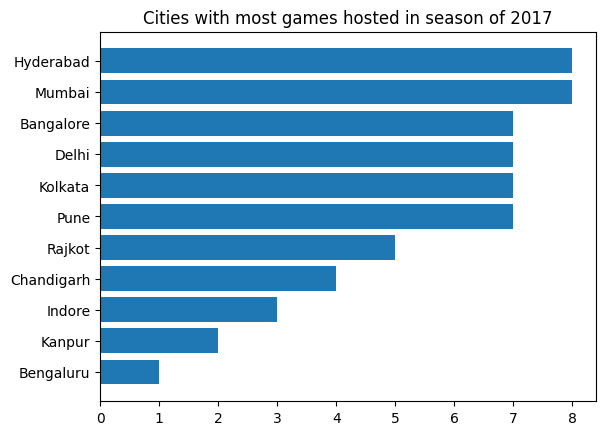

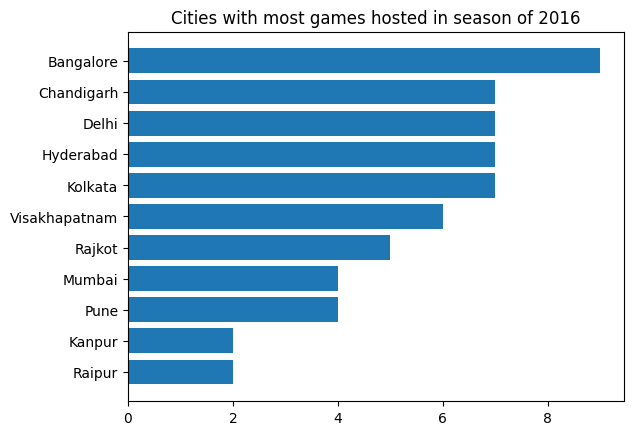

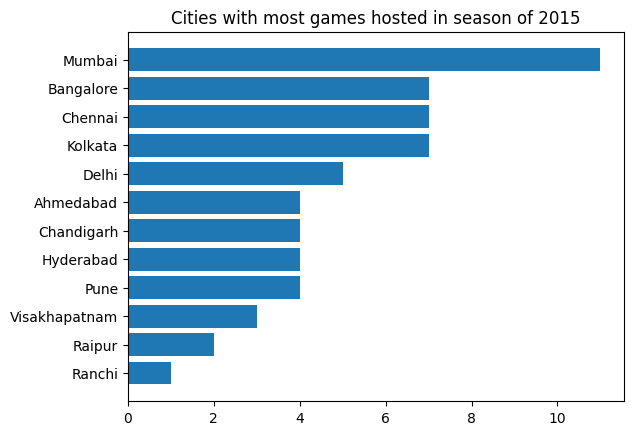

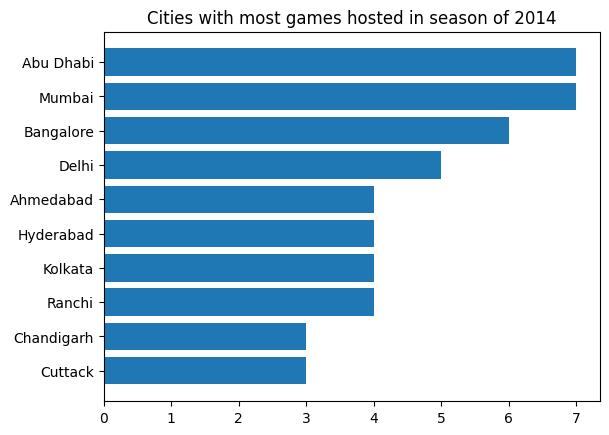

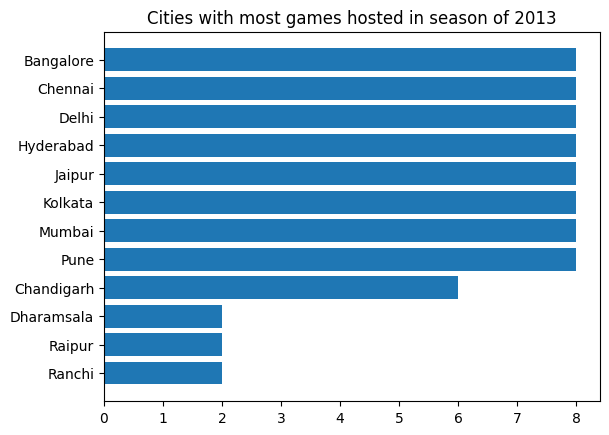

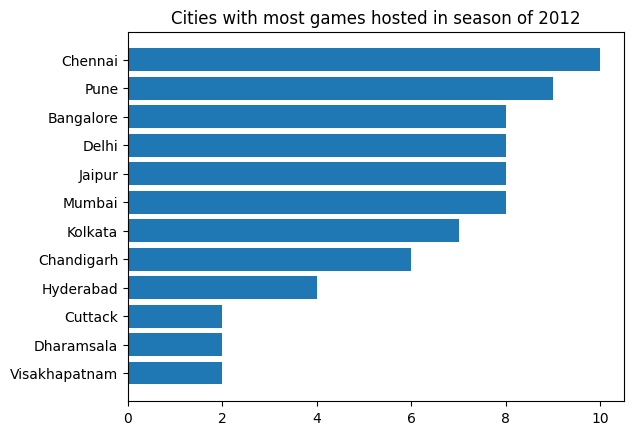

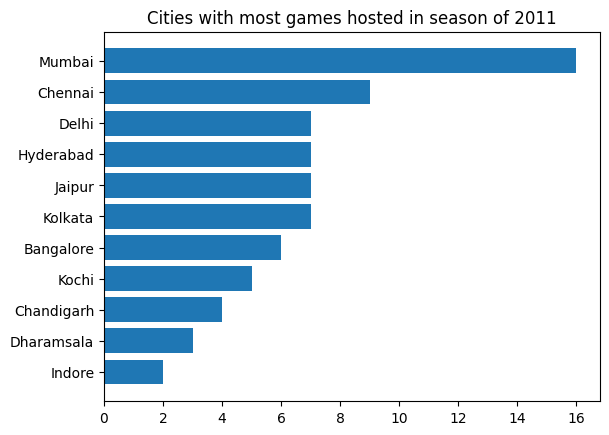

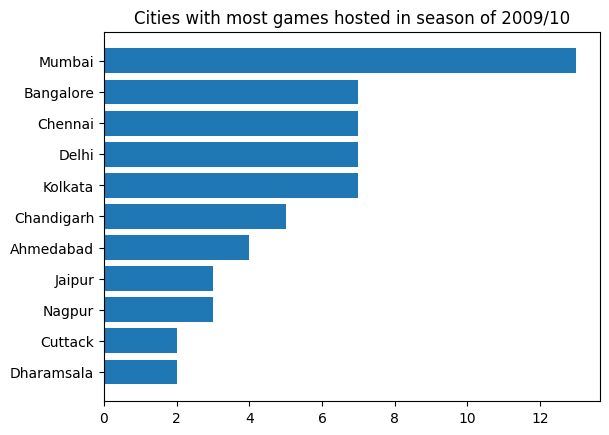

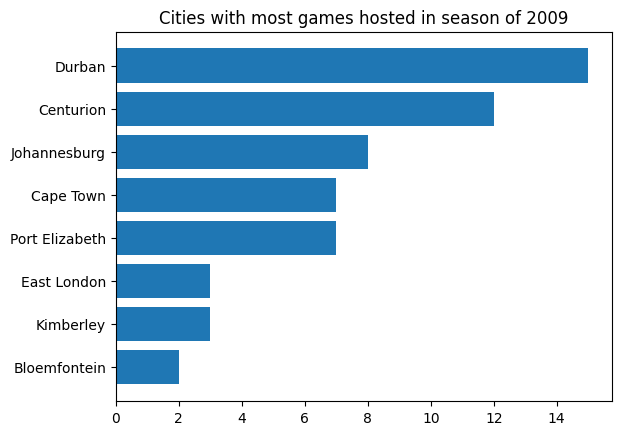

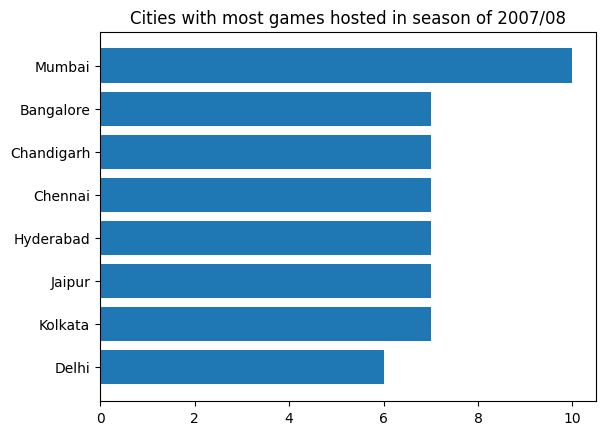

In [13]:
cities = match_info[["season", "city"]]

for season in seasons:
    most_cities = cities.loc[cities["season"] == str(season)].value_counts().reset_index(name="count")
    plt.title(f"Cities with most games hosted in season of {season}")
    plt.barh(most_cities["city"][::-1], most_cities["count"][::-1])
    plt.show()

In [15]:
umpires = match_info[["season", "umpire1", "umpire2", "umpire3"]]

for season in seasons:
    most_umpires = umpires.loc[umpires["season"] == str(season)].value_counts().reset_index(name="count")
    umpire1 = most_umpires["umpire1"].value_counts()
    umpire2 = most_umpires["umpire2"].value_counts()
    umpire3 = most_umpires["umpire3"].value_counts()

(umpire1
 BF Bowden         11
 Asad Rauf         10
 BR Doctrove        6
 SJ Davis           6
 DJ Harper          5
 Aleem Dar          5
 MR Benson          4
 BG Jerling         3
 IL Howell          3
 AV Jayaprakash     2
 RE Koertzen        2
 Name: count, dtype: int64,
 umpire2
 RE Koertzen       9
 GA Pratapkumar    6
 AM Saheba         6
 I Shivram         6
 K Hariharan       6
 RB Tiffin         5
 SL Shastri        5
 AV Jayaprakash    4
 DJ Harper         3
 IL Howell         3
 BG Jerling        1
 BR Doctrove       1
 MR Benson         1
 SJ Davis          1
 Name: count, dtype: int64,
 umpire3
 SJ Davis          5
 SL Shastri        5
 BR Doctrove       5
 K Hariharan       4
 BF Bowden         4
 I Shivram         3
 Asad Rauf         3
 AM Saheba         3
 DJ Harper         3
 GA Pratapkumar    3
 MR Benson         3
 AV Jayaprakash    3
 Aleem Dar         2
 BG Jerling        2
 IL Howell         2
 RE Koertzen       2
 S Ravi            1
 RB Tiffin         1
 SK